<a href="https://colab.research.google.com/github/mabhipsa12/Credit_risk_data/blob/main/Copy_of_%3C%3CAbhipsa%3E%3E%3C%3CML_1%3E%3EProject_Solution_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK LIST

Task-1: Problem Statement  

Task-2: Data Exploration and Validation

Task-3: Data Cleaning

Task-4: Model Building Simple Models(Logistic Regregression and
Decision trees)

Task-5: Model Validation metrics calculation

Task-6: Handling Class imbalance(Rebuild Simple ML models)

Task-7: Feature Engineering

Task-8: Ensemble Methods - XGB and RF

Task-9: Model presentation

Task-10: Interview questions on the project




# Project Objective
## Background
## Goal, Number of Resources, Business Impact, Time Taken



## ## Project Objective
The objective of this project is to develop a machine learning model that predicts the likelihood of a credit card client defaulting on their payments in the next month. The model uses demographic data, repayment history, and financial details to generate accurate predictions that can assist financial institutions in managing credit risks more effectively.

## Background
This dataset contains information on credit card clients in Taiwan from April to September 2005. It includes various features such as demographic details (age, gender), credit information (credit limit), and payment histories. The goal of this project is to predict whether a client will default on their credit card payment in the subsequent month. This project is aimed at providing insights that can assist financial institutions in mitigating risks associated with credit defaults.

## Goal
The goal of this project is to build a robust machine learning model that accurately predicts if a client will default on their credit payment. The model will consider features such as credit limit, payment history, and demographic information, to generate risk scores for each client, thereby helping financial institutions make informed decisions.

## Number of Resources
- **People**: One data scientist (for data preprocessing, model building, and evaluation)
- **Tools**: Python, Google Colab, libraries like `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`
- **Data**: Credit card payment dataset (Taiwan)
- **Hardware**: Computer with internet access, cloud computing (Google Colab)

## Business Impact
This project will help financial institutions make better data-driven decisions regarding credit card payments by predicting which clients are at risk of defaulting. By identifying high-risk clients early, financial institutions can take preventative actions, such as adjusting credit limits or offering payment plans. The business impact includes:
- **Improved Risk Management**: Identifying high-risk clients in advance can help reduce defaults.
- **Cost Savings**: Preventing defaults by proactively managing high-risk clients.
- **Customer Retention**: Offering early interventions to at-risk customers to retain them.

## Time Taken
The estimated time for completing the project is as follows:
- **Data Collection & Preprocessing**: 1 day
- **Exploratory Data Analysis (EDA)**: 1-2 day
- **Model Building & Training**: 1-2 days
- **Model Evaluation & Optimization**: 2 days
- **Final Report & Presentation**: 1-2 days
- **Total Estimated Time**: Approximately 1 week



# Data Exploration and Validation


https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [6]:
import pandas as pd
credit_risk_data=pd.read_csv("https://raw.githubusercontent.com/datavedi1/my_datasets/main/credit_risk_data/UCI_Credit_Card.csv")
credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
#What are number of rows and columns
credit_risk_data.shape

(30000, 25)

In [8]:
#Are there any suspicious variables?
credit_risk_data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

In [4]:
#Display the variable formats
credit_risk_data.dtypes

,0
ID,int64
LIMIT_BAL,float64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


In [5]:
#Print the first 10 observations
credit_risk_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [8]:
#Are there any   variables with missing values?
credit_risk_data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


# Data Exploration

In the overall dataset there are some problems that are need to be investigated and evaluated:
1.Just after PAY_0 there can't be PAY_2 which says PAY_1 is either missing or PAY_0 should be replaced by 1.

## Discrete/Categorical Variables Exploration

CAT VAR 1

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
print(credit_risk_data['ID'].value_counts())


ID
1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: count, Length: 30000, dtype: int64


CAT VAR 2

SEX
2    18112
1    11888
Name: count, dtype: int64


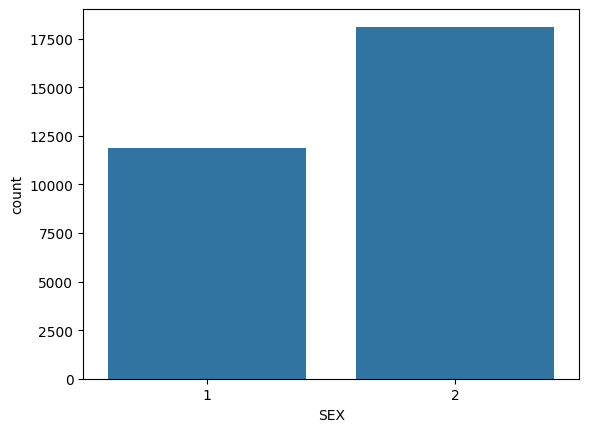

In [10]:
print(credit_risk_data['SEX'].value_counts())
sns.countplot(x='SEX',data=credit_risk_data)
plt.show()

CAT VAR 3

Findings

Total 14 Outliers are there and also the presence of unknown or ambiguous categories (5, 6, 0) suggests potential data quality issues so it needs further investigation.

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


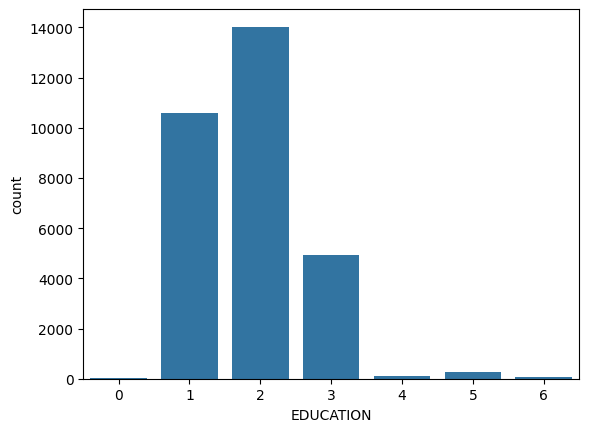

In [11]:
print(credit_risk_data['EDUCATION'].value_counts())
sns.countplot(x='EDUCATION',data=credit_risk_data)
plt.show()

CAT VAR 4

Findings:

0 having 54 counts are outlier here so need to be investigated and treated further.

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


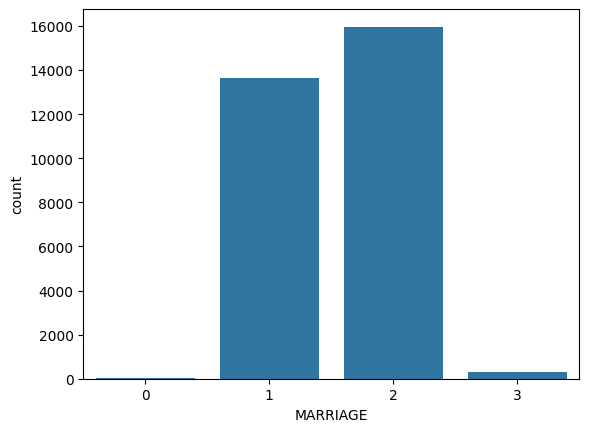

In [12]:
print(credit_risk_data['MARRIAGE'].value_counts())
sns.countplot(x='MARRIAGE',data=credit_risk_data)
plt.show()

In [ ]:
CAT VAR 5

Findings:

In [29]:
# PAY_0 need to be replaced by PAY_1 to maintain a continuity.
#0 and -2 are outliers here as these are not as per the Data Dictionary
print(credit_risk_data['PAY_0'].value_counts())
print(credit_risk_data['PAY_2'].value_counts())
print(credit_risk_data['PAY_3'].value_counts())
print(credit_risk_data['PAY_4'].value_counts())
print(credit_risk_data['PAY_5'].value_counts())

KeyError: 'PAY_0'

## Cat Var2

Findings

## Cat Var3..

Findings

## Continuous Variables Exploration

## Continuous Var1

Findings

## Continuous Var2

Findings

## Continuous Var3..

Findings

# Data Cleaning and Data Preparation

## Var1 Cleaning

## Var2 Cleaning

# Model Building
Select the right model, Include Feature Engineering, Perform Model Validation, Multiple models and performance comparison


# Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc.

# Model  Deployment
## Optional step